In [1]:
from IPython.display import display, Image
from pprint import pprint
from itertools import chain

from sympy import Function, Symbol, symbols

from ginv import *
sympy.init_printing()

In [2]:
x1, x2, x3 = sympy.symbols('x1, x2, x3', real=True)
u = sympy.Function('u', real=True)(x1, x2, x3)

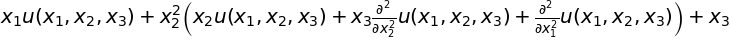

In [3]:
p = (u.diff(x1, 2) + x3*u.diff(x2, 2) + u*x2)*x2**2 + x3 + u*x1
p

In [2]:
Monom.cmp = Monom.TOPdeglex

In [5]:
var = ['x1', 'x2', 'x3']
fun = ['u']
Monom.init(var, fun)
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly
var, fun = PolyDiff.init()
x1, x2, x3 = var
u = fun[0]

In [6]:
p = diff2poly(p)
print(p)
print(f"{p}")
print(f"{p!s}")
print(f"{p!r}")
p

df(u, x1, 2)*x2**2 + df(u, x2, 2)*x2**2*x3 + df(u)*(x1 + x2**3) + x3
df(u, x1, 2)*x2**2 + df(u, x2, 2)*x2**2*x3 + df(u)*(x1 + x2**3) + x3
df(u, x1, 2)*x2**2 + df(u, x2, 2)*x2**2*x3 + df(u)*(x1 + x2**3) + x3
[[[0;2 0 0], x2**2], [[0;0 2 0], x2**2*x3], [[0;0 0 0], x1 + x2**3], [[0 0 0], x3]]


[[[0;2 0 0], x2**2],
 [[0;0 2 0], x2**2*x3],
 [[0;0 0 0], x1 + x2**3],
 [[0 0 0], x3]]

In [7]:
p = (df(u, x1, x1) + x3*df(u, x2, 2) + df(u)*x2)*x2**3 + x3 + df(u, x1, 0, x3, 0)*x1
print(p)
print(f"{p}")
print(f"{p!s}")
print(f"{p!r}")
p

df(u, x1, 2)*x2**3 + df(u, x2, 2)*x2**3*x3 + df(u)*(x1 + x2**4) + x3
df(u, x1, 2)*x2**3 + df(u, x2, 2)*x2**3*x3 + df(u)*(x1 + x2**4) + x3
df(u, x1, 2)*x2**3 + df(u, x2, 2)*x2**3*x3 + df(u)*(x1 + x2**4) + x3
[[[0;2 0 0], x2**3], [[0;0 2 0], x2**3*x3], [[0;0 0 0], x1 + x2**4], [[0 0 0], x3]]


[[[0;2 0 0], x2**3],
 [[0;0 2 0], x2**3*x3],
 [[0;0 0 0], x1 + x2**4],
 [[0 0 0], x3]]

In [8]:
type(p) == Poly

False

In [9]:
type(p) == PolyDiff

True

prolong 0, Q 2
df(u, x3, 2)
prolong 0, Q 2
df(u, x1, 2)
prolong 2, Q 0
df(u, x1, x3, 2)
prolong 3, Q 0
df(u, x2, 2, x3)
prolong 2, Q 0
df(u, x2, x3, 2)
prolong 3, Q 0
df(u, x1, x2, 2, x3)
prolong 3, Q 0
df(u, x1, x2, x3, 2)
prolong 4, Q 0
df(u, x2, 4)
prolong 3, Q 0
df(u, x2, 3, x3)
prolong 4, Q 0
df(u, x1, x2, 4)
prolong 4, Q 0
df(u, x1, x2, 3, x3)
prolong 5, Q 0
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.02 sec
    count: 11
reduction: 29
       HP: 12


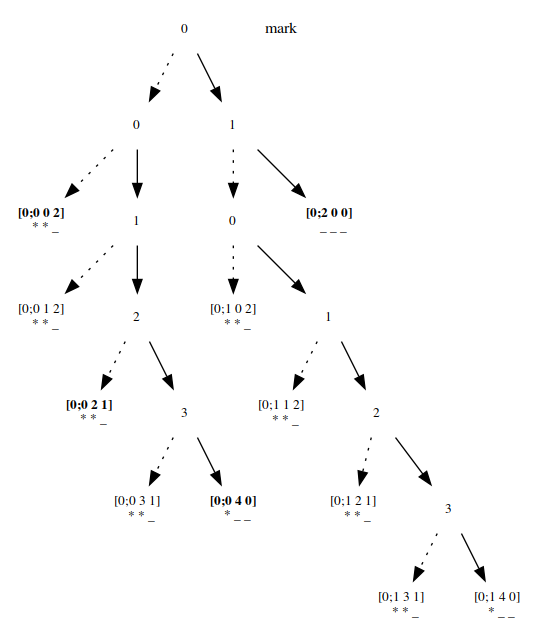

In [10]:
diablo = Janet()
# diablo = JanetCache()
res = ginvBlockLow((
df(u, x1, 2) + x3*df(u, x2, 2),\
df(u, x3, 2)), \
diablo, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {diablo.count()}")
print(f"reduction: {diablo.reduction()}")
print(f"       HP: {diablo.HP()}")
diablo.saveImage('diablo.pdf', level=1)
diablo.saveImage('diablo.png', level=1)
Image('./diablo.png')

In [12]:
for w in diablo:
    print(w.poly)

df(u, x3, 2)
df(u, x2, x3, 2)
df(u, x2, 2, x3)
df(u, x2, 3, x3)
df(u, x2, 4)
df(u, x1, x3, 2)
df(u, x1, x2, x3, 2)
df(u, x1, x2, 2, x3)
df(u, x1, x2, 3, x3)
df(u, x1, x2, 4)
df(u, x1, 2) + df(u, x2, 2)*x3


In [13]:
for w in diablo.GB():
    print(w.poly)

df(u, x3, 2)
df(u, x2, 2, x3)
df(u, x2, 4)
df(u, x1, 2) + df(u, x2, 2)*x3


In [14]:
for f in fun:
    for v in var:
        for i in range(5):
            if not df(f, v, i).NF(diablo):
                print(df(f, v, i))
                break

df(u, x1, 4)
df(u, x2, 4)
df(u, x3, 2)


In [16]:
degs = {}
for f in fun:
    degs[f] = [0 for v in var]
    for k, v in enumerate(var):
        for i in range(5):
            if not df(f, v, i).NF(diablo):
                degs[f][k] = i
                print(df(f, v, i))
                break
pprint(degs)

df(u, x1, 4)
df(u, x2, 4)
df(u, x3, 2)
{u: [4, 4, 2]}


In [31]:
def gen_series(self, deg=5):
    res = []
    for f in fun:
        r = [0 for v in var]
        for k, v in enumerate(var):
            for i in range(deg):
                if not df(f, v, i).NF(self):
                    r[k] = i
                    break
        l0 = []
        for k, v in enumerate(var):
            l1 = [v**i for i in range(r[k])]
            if not l0:
                l0 = l1
            else:
                l2 = []
                for v0 in l0:
                    for v1 in l1:
                        l2.append(v0*v1)
                l0 = l2
        dv = [v for k, v in enumerate(var) if r[k] == 0]
        for k, v in enumerate(l0):
            l0[k] = Function(f"{f}{k}")(*dv)*v if dv else Symbol(f"{f}{k}")*v
        res.append(sum(l0))
    return res
gen_series(diablo)

In [20]:
Function('a')()

In [13]:
rows, i = {}, 0
for d in range(5):
    for m in Monom.gradus(d, pos=0):
        if not diablo.find(m):
            print(f"{m.df()}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число произвольных констант в ряде Тейлора: {len(rows)}")

df(u), 
df(u, x1), df(u, x2), df(u, x3), 
df(u, x1, x2), df(u, x1, x3), df(u, x2, 2), df(u, x2, x3), 
df(u, x1, x2, 2), df(u, x1, x2, x3), df(u, x2, 3), 
df(u, x1, x2, 3), 
число произвольных констант в ряде Тейлора: 12


In [14]:
T = 0
for d in range(5):
    for m in Monom.gradus(d, pos=0):
        r = PolyDiff(m)
        r.NFhead(diablo)
        if r or True:
            p = "".join(str(i) for i in m)
            r = sympy.Symbol(f"C_{{{p}}}")
            for i, v in enumerate(m):
                if v:
                    r *= var[i]**v
            T += r
T

In [15]:
eqs = []
for w in diablo.GB():
    eqs.append(eval(str(w.poly).
        replace('df', 'sympy.diff').replace('u', 'T')).expand())
eqs

In [16]:
def to_eqs(a, var):
    for x in var:
        r = []
        for b in a:
            if b:
                r.append([b.coeff(x, i) for i in range(b.as_poly(x).degree()+1) if b.coeff(x, i)])
        a = chain(*r)
    return list(a)

In [17]:
a = to_eqs(eqs, [x1, x2, x3])
a

In [18]:
sol = sympy.solve(a)
sol

In [19]:
T0 = T.subs(sol)
T0

In [20]:
for w in diablo.GB():
    print(eval(str(w.poly).
        replace('df', 'sympy.diff').replace('u', 'T0')).expand())

0
0
0
0


In [21]:
T0.diff(x2, 2, x3).expand()

In [22]:
(T0.diff(x1, 2) + x3*T0.diff(x2, 2)).expand()

In [23]:
alpha, beta, gamma = sympy.symbols('alpha, beta, gamma', real=True)

var = ['t', 'x', 'y']
fun = ['A', 'B', 'C', 'D', 'E']
Monom.init(var, fun)
df = PolyDiff.df
diff2poly = PolyDiff.diff2poly
var, fun = PolyDiff.init()
t, x, y = var
A, B, C, D, E = fun

In [24]:
eqs = [
df(C, t)*(-1) + df(B, y)*(-2*gamma),
df(A, y),
df(D, y),
df(C, y, 2),
df(E, y, 4)*(-beta*gamma**2) + df(D, t, 3)*(-1),
df(D, y, 4),
df(C, y, 4),
df(B, y, 4),
df(A, y, 4),
df(C, x),
df(B, x)*(-3) + df(C, y)*2 + df(D)*(-1),
df(A, x),
df(D, x),
df(E, x, y, 2)*beta*gamma + df(D, t, 2)*(-1),
df(D, x, y, 2),
df(C, x, y, 2),
df(B, x, y, 2),
df(A, x, y, 2),
df(E, x, 2)*(-beta) + df(D, t)*(-1),
df(D, x, 2),
df(C, x, 2),
df(B, x, 2),
df(A, x, 2),
df(B, t)*(-3) + df(E, x)*(-3*beta) + df(C, y)*2*alpha + df(D)*2*alpha,
df(D, x),
df(C, x),
df(B, x)*(-3) + df(C, y)*2 + df(D)*(-1),
df(A, x),
df(A, t)*3 + df(C, y)*(-4) + df(D)*(-1),
df(C, t, y) + df(D, t)*(-2),
df(E, t, x)*beta + df(E, y, 2)*beta*gamma + df(D, t)*(-alpha),
df(D, t, x) + df(D, y, 2)*gamma,
df(C, t, x) + df(C, y, 2)*gamma,
df(B, t, x) + df(B, y, 2)*gamma,
df(A, t, x) + df(A, y, 2)*gamma,
df(C, t, 2)*(-1) + df(E, x, y)*2*beta*gamma,
df(D, x, y),
df(C, x, y),
df(B, x, y),
df(A, x, y)
]

In [25]:
LRT = Forest(Janet)
# diablo = JanetCache()
res = ginvBlockLow(eqs, \
LRT, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {LRT.count()}")
print(f"reduction: {LRT.reduction()}")
print(f"       HP: {LRT.HP()}")

prolong 0, Q 1
df(A, y)
prolong 0, Q 1
df(D, y)
prolong 0, Q 1
df(A, x)
prolong 0, Q 1
df(B, x)
prolong 0, Q 1
df(C, x)
prolong 0, Q 1
df(D, x)
prolong 0, Q 1
df(A, t)
prolong 0, Q 1
df(B, t)
prolong 0, Q 1
df(C, t)
prolong 0, Q 2
df(C, y, 2)
prolong 0, Q 2
df(B, y, 2), df(E, x, 2), df(E, t, x)
prolong 1, Q 3
df(E, x, y, 2)
prolong 2, Q 4
df(E, y, 4)
prolong 3, Q 0
prolong 4, Q 0
df(E, t, y, 4)
prolong 5, Q 0
prolong 0, Q 0
crit1: 0
crit2: 0
 time: 0.14 sec
    count: 16
reduction: 133
[0, 0, 0, 0]
[1, 0, 0, 0]
4 4
[2, 0, 0, 0]
4 4
[2, 0, 0, 0]
4 4
[1, 1, 0, 0]
4 4
[0, 4, 0, 0]
4 4
       HP: 5s + 6


In [31]:
for w in LRT.GB():
    print(w.poly)

df(A, y)
df(A, x)
df(A, t)*3 + df(C, y)*(-4) + df(D)*(-1)
df(B, y, 2)*gamma + df(D, t)
df(B, x)*(-3) + df(C, y)*2 + df(D)*(-1)
df(B, t)*(-3) + df(E, x)*(-3*beta) + df(C, y)*2*alpha + df(D)*2*alpha
df(C, y, 2)
df(C, x)
df(C, t)*(-1) + df(B, y)*(-2*gamma)
df(D, y)
df(D, x)
df(E, y, 4)*(-beta*gamma**2) + df(D, t, 3)*(-1)
df(E, x, y, 2)*beta*gamma + df(D, t, 2)*(-1)
df(E, x, 2)*(-beta) + df(D, t)*(-1)
df(E, t, x)*beta + df(E, y, 2)*beta*gamma + df(D, t)*(-alpha)
